<a href="https://colab.research.google.com/github/SanskritiSahu15/CVIP-Python/blob/main/credit_card_fd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Library:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
df = pd.read_csv('/content/creditcard.csv')

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
3968,3617,1.134592,0.252051,0.488592,0.799826,-0.264819,-0.369918,-0.243365,0.049761,1.210818,...,-0.351115,-0.851463,0.186169,0.092463,0.020015,0.057976,-0.046611,0.012562,13.99,0.0
3969,3621,-1.338671,1.080974,1.291196,0.719258,0.101320,0.053896,0.001297,-0.917575,1.638510,...,0.498030,-0.483932,0.037686,0.053566,-0.560078,0.230423,-0.119911,0.321847,27.43,0.0
3970,3622,-0.339728,-2.417449,0.975517,2.537995,-1.720361,0.863005,0.032965,0.026764,2.487139,...,0.391639,0.264432,-0.735031,0.450594,0.310022,-0.231357,-0.049872,0.153526,730.32,0.0
3971,3623,-0.368639,0.947432,1.707755,0.932092,0.292956,0.189100,0.499330,0.132466,0.779412,...,-0.119045,0.056665,-0.172703,0.170073,0.139605,-0.420518,0.033794,0.005996,6.87,0.0
3972,3624,-0.663445,1.162921,1.508050,0.549405,0.231377,-0.106041,0.817977,-0.387026,1.488054,...,-0.420337,-0.361357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3973 entries, 0 to 3972
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    3973 non-null   int64  
 1   V1      3973 non-null   float64
 2   V2      3973 non-null   float64
 3   V3      3973 non-null   float64
 4   V4      3973 non-null   float64
 5   V5      3973 non-null   float64
 6   V6      3973 non-null   float64
 7   V7      3973 non-null   float64
 8   V8      3973 non-null   float64
 9   V9      3973 non-null   float64
 10  V10     3973 non-null   float64
 11  V11     3973 non-null   float64
 12  V12     3973 non-null   float64
 13  V13     3973 non-null   float64
 14  V14     3973 non-null   float64
 15  V15     3973 non-null   float64
 16  V16     3973 non-null   float64
 17  V17     3973 non-null   float64
 18  V18     3973 non-null   float64
 19  V19     3973 non-null   float64
 20  V20     3973 non-null   float64
 21  V21     3973 non-null   float64
 22  

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [ ]:
df=df.dropna()

In [ ]:
print("unique value in class festure",df['Class'].unique())
df['Class'].value_counts()

unique value in class festure [0. 1.]


Class
0.0    3970
1.0       2
Name: count, dtype: int64

In [ ]:
fraud=df[df.Class==1]
Notfraud=df[df.Class==0]
print(fraud.shape)
print(Notfraud.shape)

(2, 31)
(3970, 31)


In [ ]:
Notfraud=Notfraud.sample(492)
df2=pd.concat([Notfraud,fraud],axis=0)
df2.shape

(494, 31)

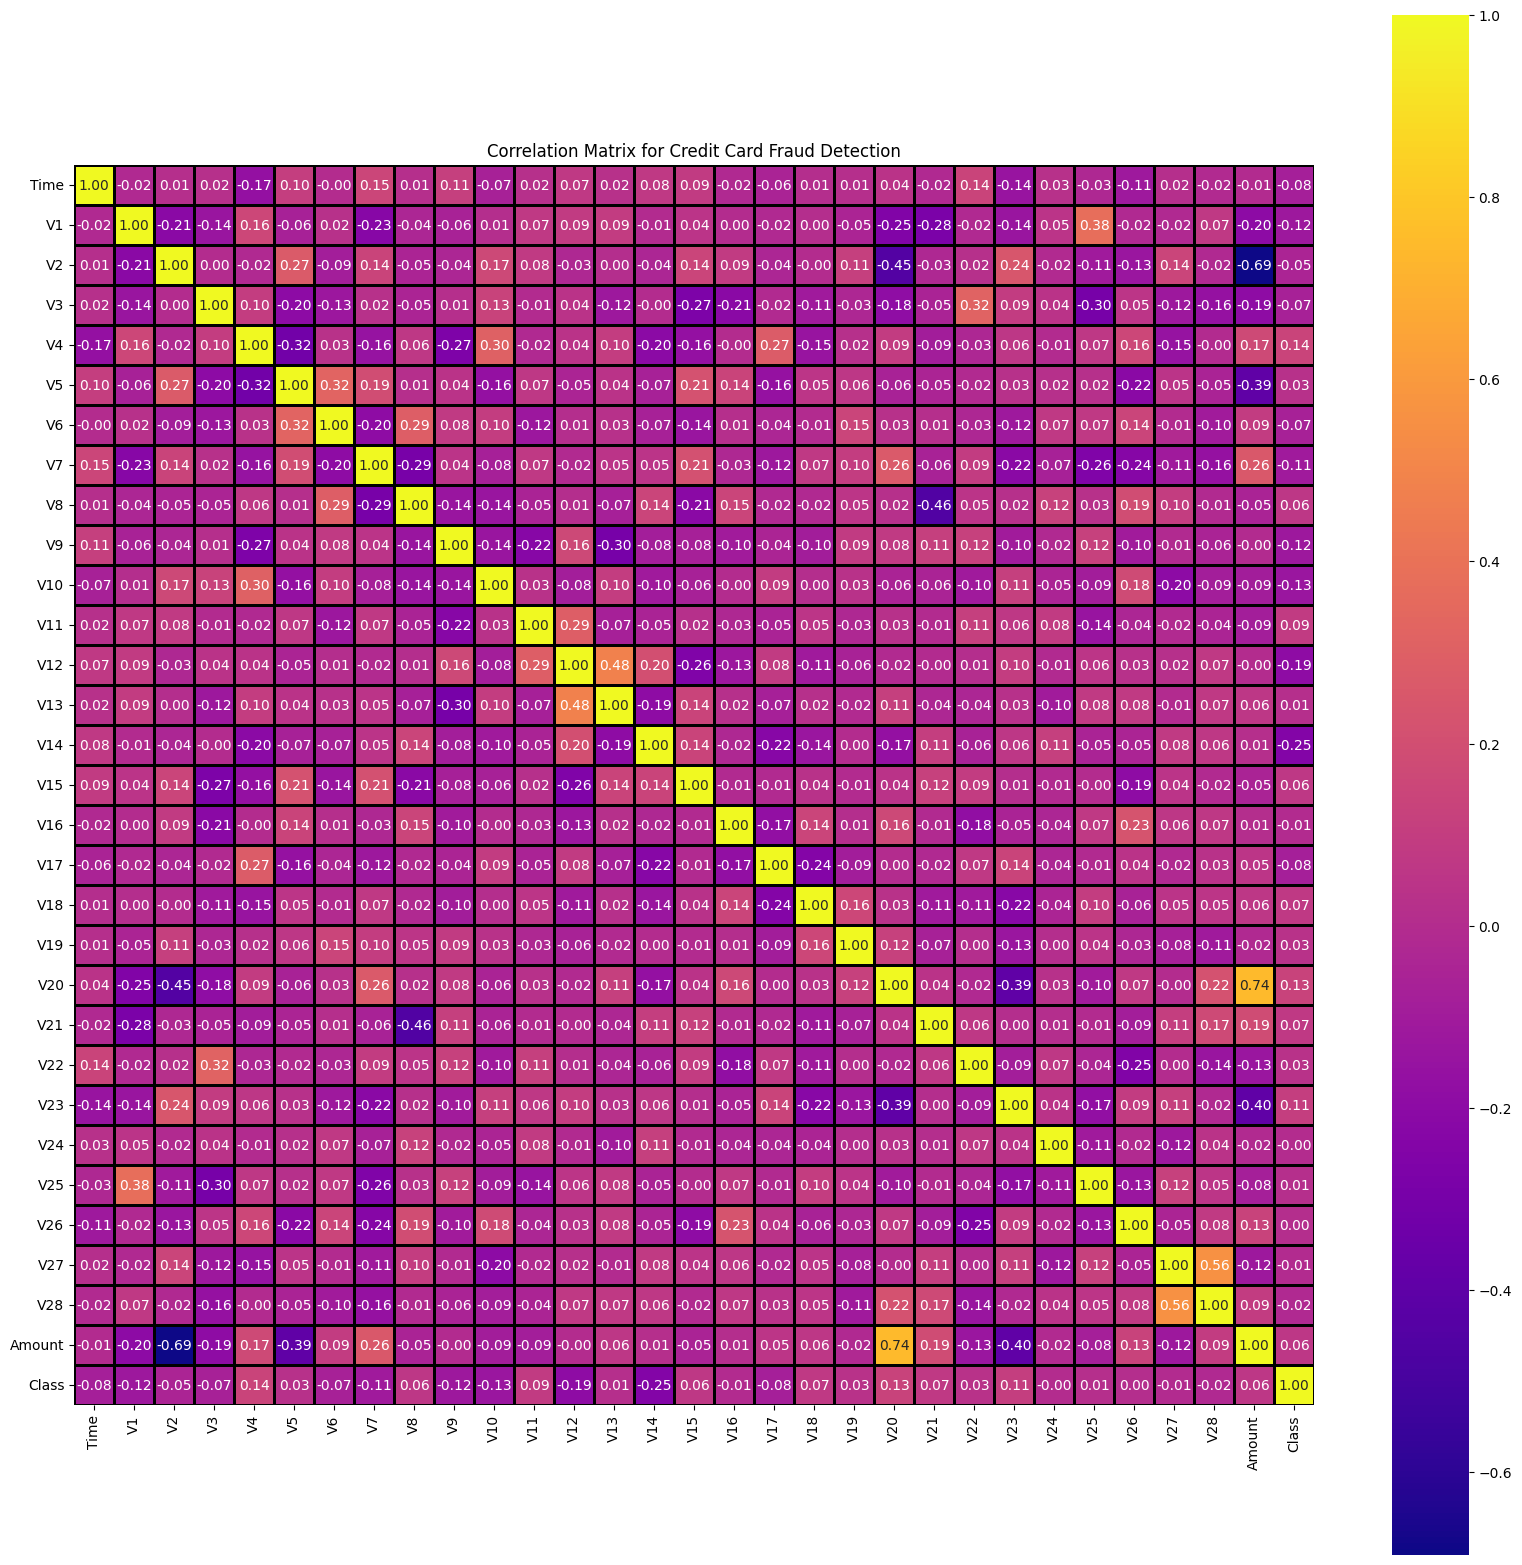

In [ ]:
corr_mat = df2.corr(method='pearson')

# Set the figure size to 20x20 inches for better readability
plt.figure(figsize=(20, 20))

# Create the heatmap with annotations and customized appearance
sns.heatmap(corr_mat,
            annot=True,        # Annotate each cell with the correlation coefficient
            fmt="0.2f",        # Format the annotations to 2 decimal places
            square=True,       # Make each cell square-shaped
            cmap="plasma",     # Use the 'plasma' colormap
            linewidths=0.8,    # Set the width of the lines between cells to 0.8 points
            linecolor="Black") # Set the color of the lines between cells to black

# Add a title to the heatmap
plt.title("Correlation Matrix for Credit Card Fraud Detection")

# Display the heatmap
plt.show()

In [ ]:
h_feature=corr_mat.index[abs(corr_mat['Class'])>=0.1].tolist()
h_feature.remove('Class')
h_feature

['V1', 'V4', 'V7', 'V9', 'V10', 'V12', 'V14', 'V20', 'V23']

In [ ]:
x=df2[h_feature]
y=df2['Class']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [ ]:
logistic=LogisticRegression(max_iter=10000)
logistic.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

In [ ]:
y_pred=logistic.predict(x_test)
acc=accuracy_score(y_test,y_pred)

In [ ]:
print(f"accuracy score = {acc}")

accuracy score = 1.0


In [ ]:
undersample = RandomUnderSampler(sampling_strategy='majority', random_state=42)
X_res, y_res = undersample.fit_resample(x, y)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)
# Train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Confusion Matrix:
 [[1]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1

